In [131]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import plotly.express as px

# Heading angle will change w.r.t. the previous position, original heading and steering angle. 
# Let the previous conditions be called as the previous state.
# Initial heading_angle (theta) with which the vehicle starts moving. 
# Assuming slip angle in the model to be 0.

# Function for the kinematic bicycle model
def kinematic_bicycle_model(x, y, theta, v, delta, a, L, dt):
    x += v * np.cos(theta) * dt
    y += v * np.sin(theta) * dt
    theta += (v / L) * np.tan(delta) * dt
    v += a * dt
    return x, y, theta, v, a


When change in steering angle is modeled as a uniform function within the range of [-π, +π]

In [132]:
def start_trajectory_when_change_is_uniform_distribution(v_init, theta_init = 0.0, a_init = 0.0, delta_init = 0.0, x_init = 0.0, y_init = 0.0, mode = "simple") :
    given_delta = delta_init
    # Parameters
    L = 5 # Wheelbase
    dt = 0.1  # Time step
    t_end = 10  # 10 seconds
    t = np.arange(0, t_end, dt)
    
    x, y, theta, v, a = x_init, y_init, theta_init, v_init, a_init
    x_traj, y_traj, theta_traj,delta_traj ,uniform_change_in_delta , v_traj, a_traj = [], [], [], [], [], [], []
    x_traj.append(x_init)
    y_traj.append(y_init)
    theta_traj.append(theta_init)
    delta_traj.append(delta_init)
    uniform_change_in_delta.append(0)
    v_traj.append(v_init)
    a_traj.append(a_init)
    
    for _ in t:
        x, y, theta, v, a = kinematic_bicycle_model(x, y, theta, v, delta_init, a, L, dt)
        if (mode == "simple"): 
            change = random.uniform(-0.5, 0.5)
            delta_init += change
        elif (mode == "complex"):
            ## Modeled the change in steering angle as a uniform R.V. 
            # Final = Initial + Change 
            # Or : Initial +=Change
            change = np.pi * random.uniform(-0.5, 0.5)
            delta_init += change # [-90, +90]
        # Comment out the below if block, if the effect of variable acceleration is to be neglected.
        if (a!=0.0):
            a += a * random.uniform(-0.5, 0.5)
            while (a==0.0):
                a += a * random.uniform(-0.5, 0.5)

        x_traj.append(x)
        y_traj.append(y)
        theta_traj.append(theta)
        delta_traj.append(delta_init)
        uniform_change_in_delta.append(change)
        v_traj.append(v)
        a_traj.append(a)

    return x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj  

When change in steering angle is modeled as a gaussian function with 0 mean and 1 standard deviation.

In [133]:
def start_trajectory_when_change_is_gaussian_distribution(v_init, theta_init = 0.0, a_init = 0.0, delta_init = 0.0, x_init = 0.0, y_init = 0.0, mode = "complex") :
    given_delta = delta_init
    # Parameters
    L = 5 # Wheelbase
    dt = 0.1  # Time step
    t_end = 10  # 10 seconds
    t = np.arange(0, t_end, dt)
    
    x, y, theta, v, a = x_init, y_init, theta_init, v_init, a_init
    x_traj, y_traj, theta_traj, delta_traj,gaussian_change_in_delta, v_traj, a_traj = [], [], [], [], [], [], []
    x_traj.append(x_init)
    y_traj.append(y_init)
    theta_traj.append(theta_init)
    delta_traj.append(delta_init)
    gaussian_change_in_delta.append(0)
    v_traj.append(v_init)
    a_traj.append(a_init)
    
    for _ in t:
        x, y, theta, v, a = kinematic_bicycle_model(x, y, theta, v, delta_init, a, L, dt)
        if (mode == "simple"): 
            change = random.gauss(0, 0.5)
            delta_init += change  # mean 0, standard deviation pi/2
        elif (mode == "complex"):
            ## Modeled the change in steering angle as a Gaussian R.V. 
            # Final = Initial + Change 
            # Or : Initial +=Change
            change = np.pi * random.gauss(0, 0.5)
            delta_init += change  # mean 0, standard deviation pi/2
        # Comment out the below if block, if the effect of variable acceleration is to be neglected.

        if (a!=0.0):
            # Acceleration still change w.r.t. random.uniform
            a += a * random.uniform(-0.5, 0.5)
            while (a==0.0):
                a += a * random.uniform(-0.5, 0.5)

        x_traj.append(x)
        y_traj.append(y)
        theta_traj.append(theta)
        delta_traj.append(delta_init)
        gaussian_change_in_delta.append(change)
        v_traj.append(v)
        a_traj.append(a)

    return x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj  

Plots : When change in Steering Angle is Uniform Distribution

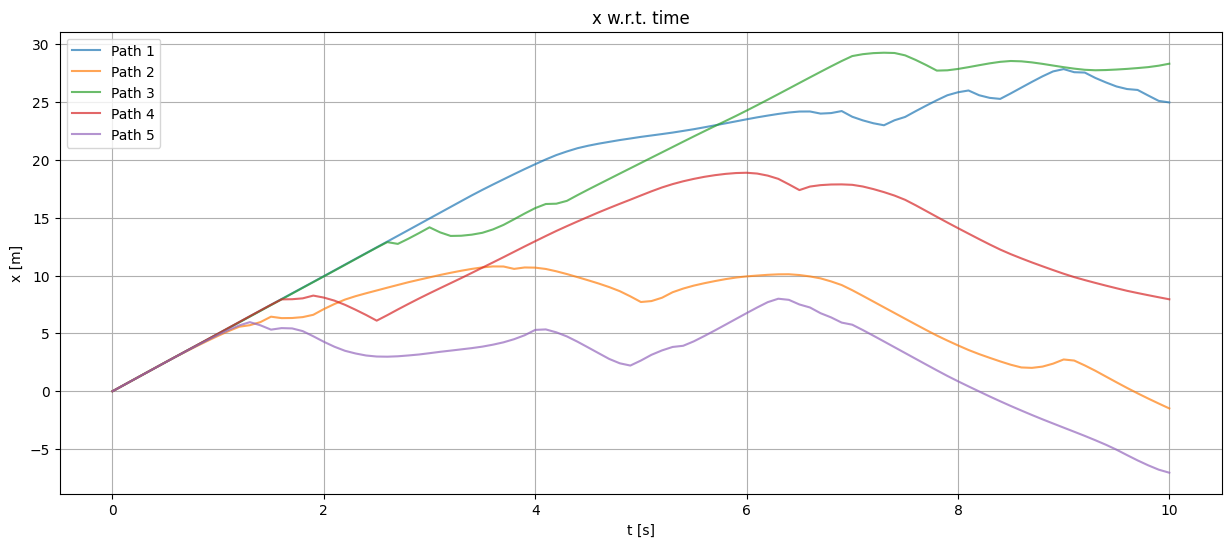

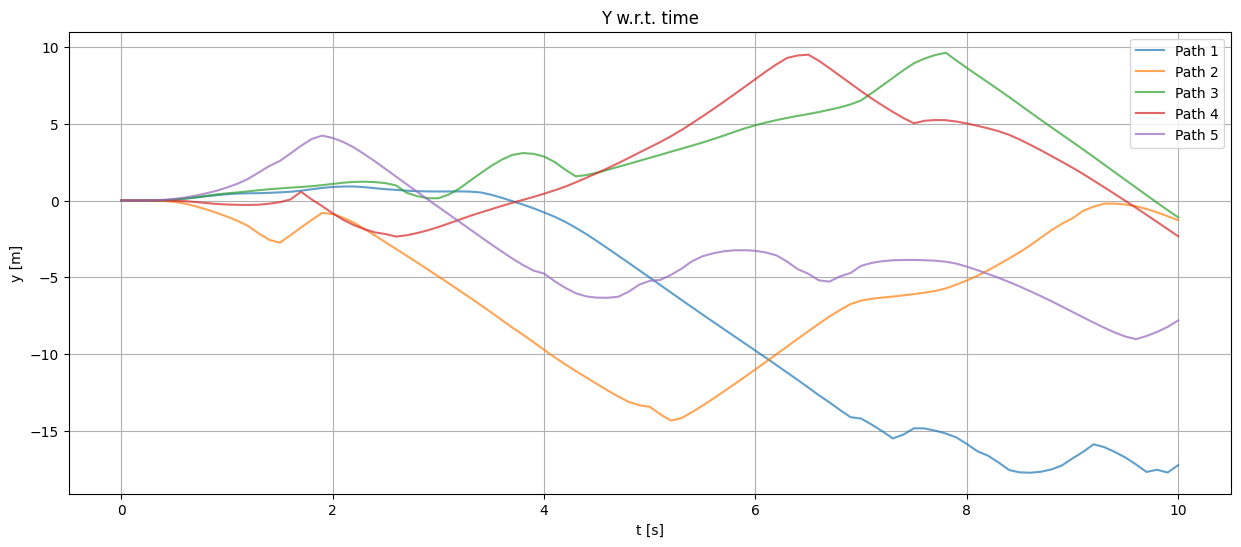

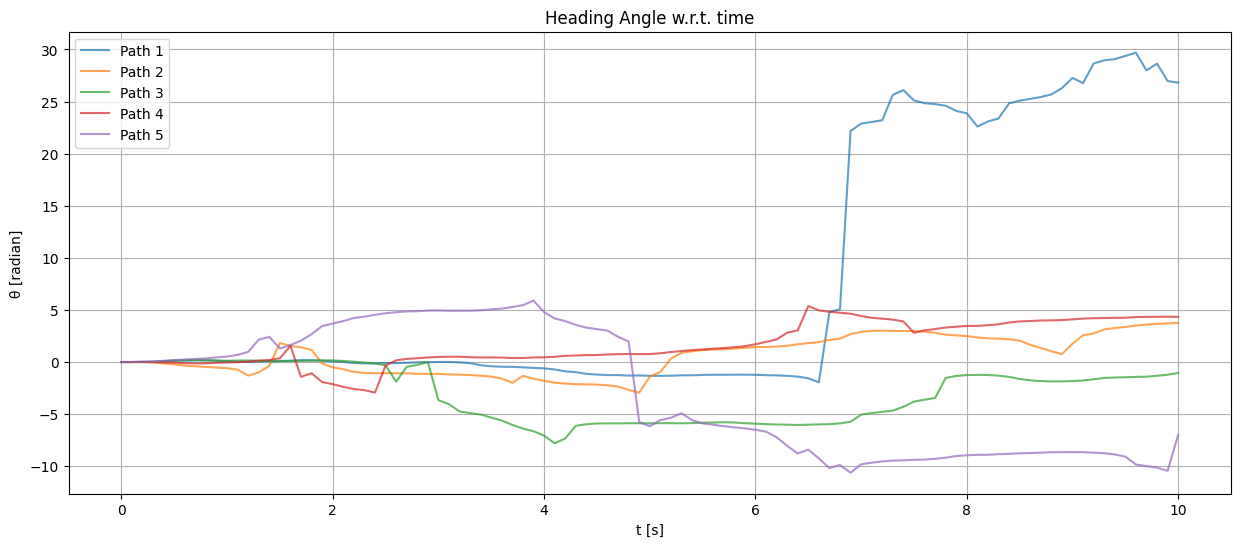

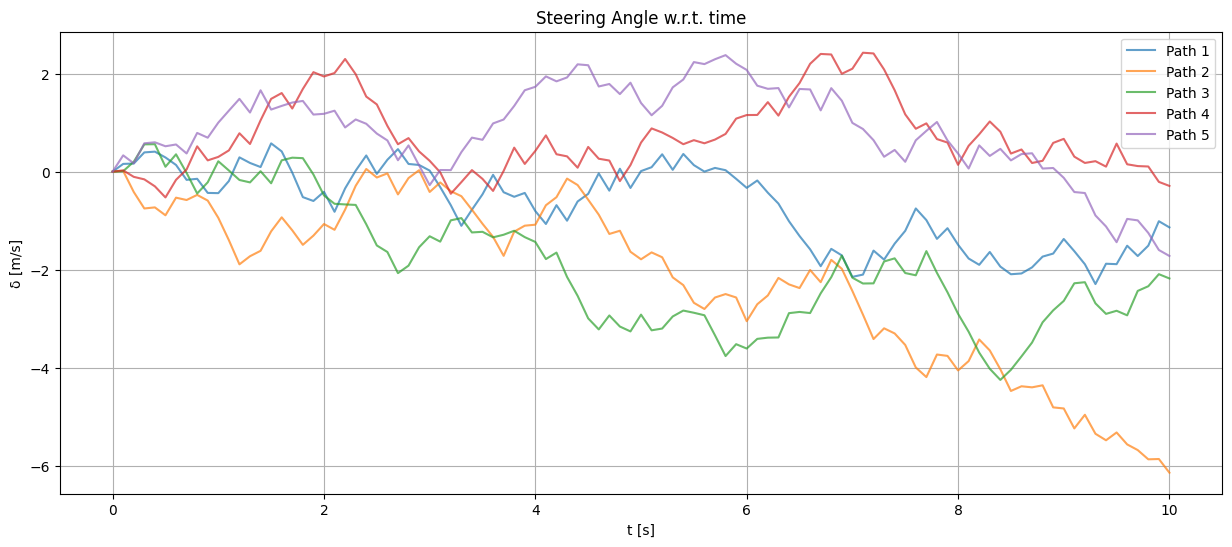

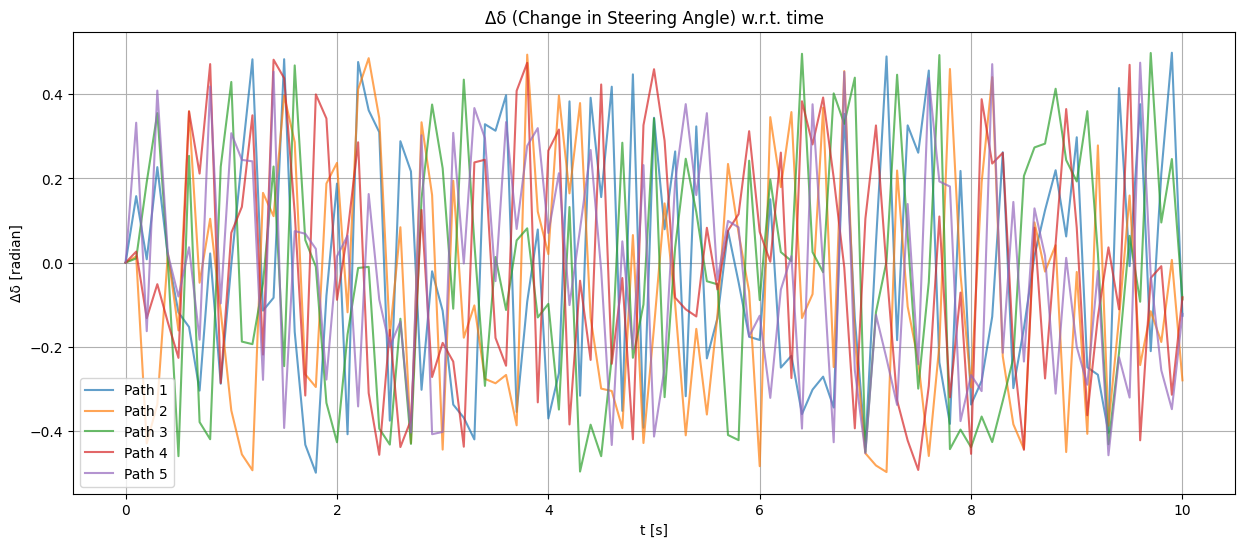

In [134]:
# Making 5 possible trajectories
trajectories = []
for i in range(5):
    x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj = start_trajectory_when_change_is_uniform_distribution(theta_init=0.0, a_init=0.0, delta_init=0.0, v_init=5, mode="simple")
    trajectories.append((x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj))


# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Create the plot
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Δδ is Gausian <br>Simplest Kinematic Bicycle Model (Δδ ∈ [-1, +1]) <br>θi = 0, δi = 0, a = 0", render_mode="svg")
# Add hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()


# Plotting in x w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, x_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("x [m]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("x w.r.t. time")
plt.legend()
plt.show()


# Plotting in y w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, y_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("y [m]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Y w.r.t. time")
plt.legend()
plt.show()


# Plotting in theta(t) w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, theta_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("θ [radian]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Heading Angle w.r.t. time")
plt.legend()
plt.show()


# Plotting in delta(t) w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, delta_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("δ [m/s]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Steering Angle w.r.t. time")
plt.legend()
plt.show()


# Plotting variation in steering angle w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, uniform_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, uniform_change_in_delta, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("Δδ [radian]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Δδ (Change in Steering Angle) w.r.t. time")
plt.legend()
plt.show()

Plots : When change in Steering Angle is Gaussian Distribution

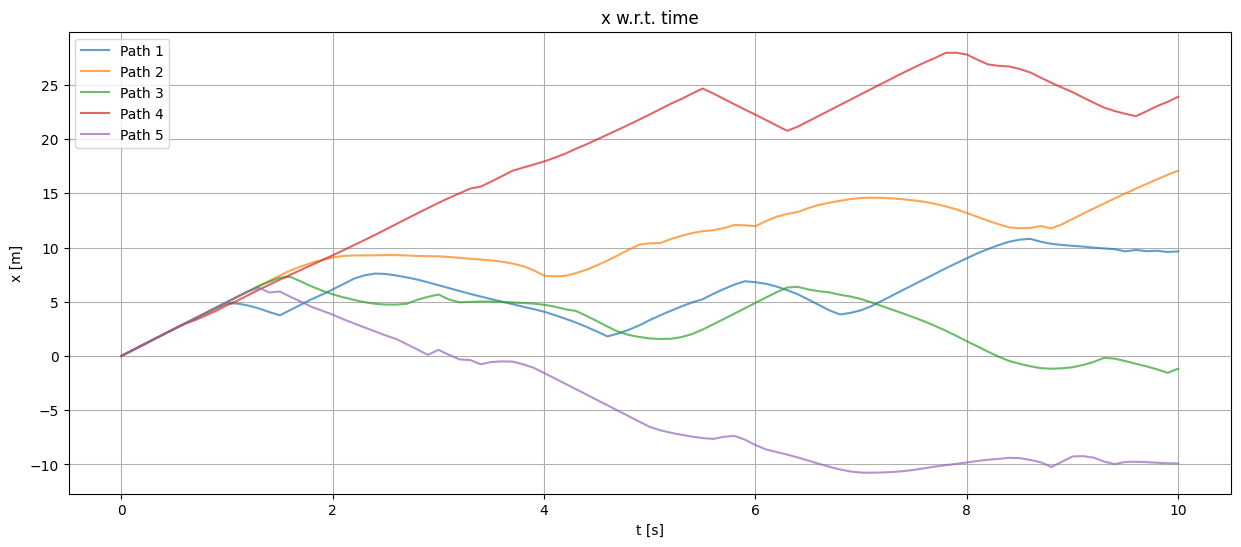

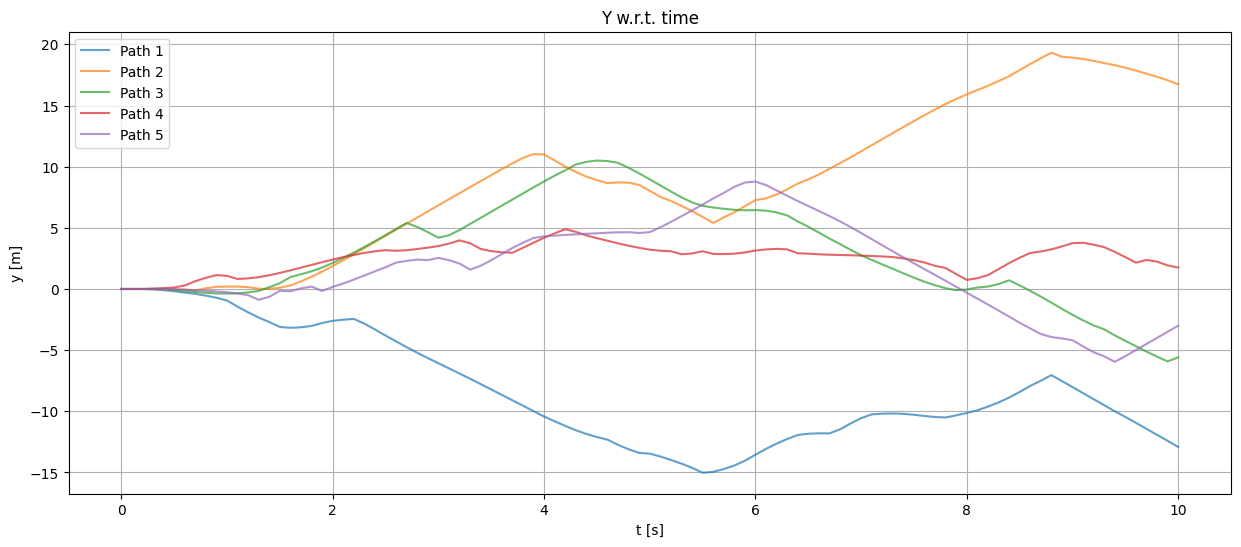

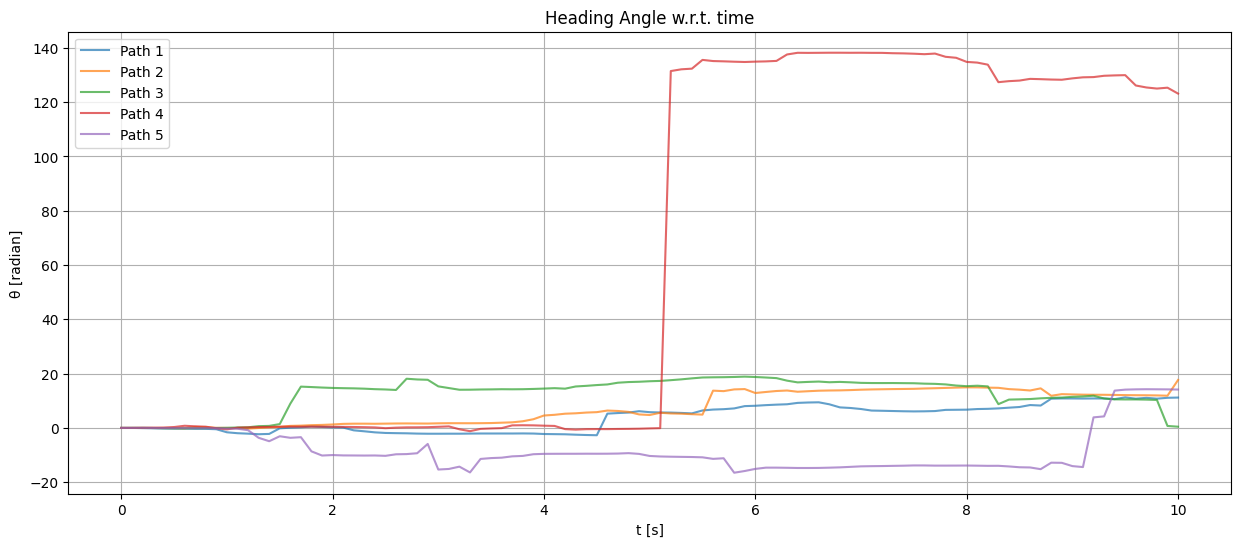

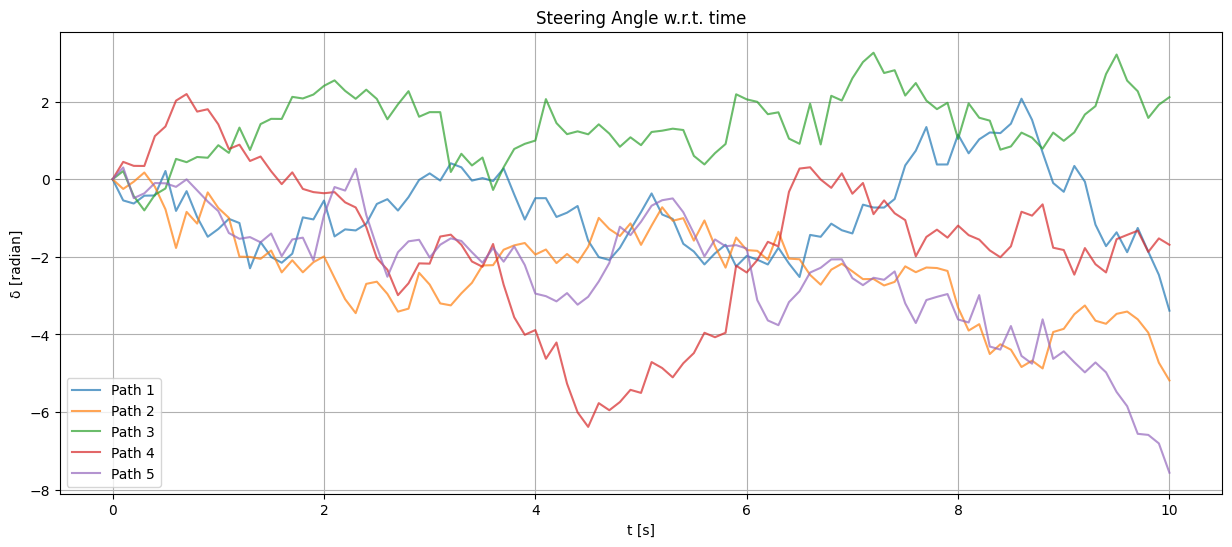

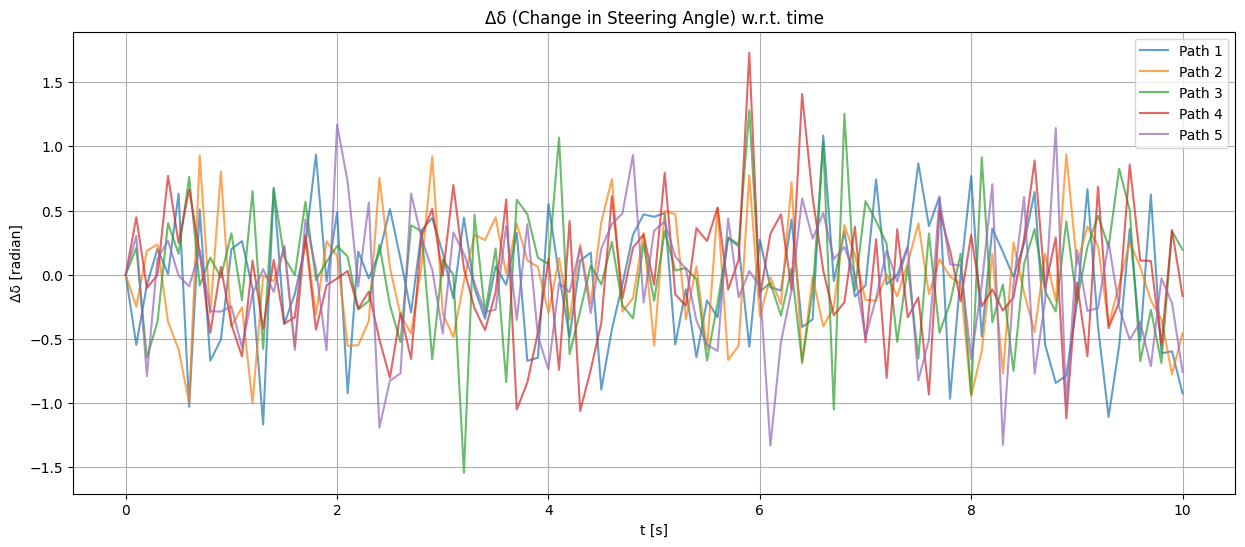

In [135]:
# Making 5 possible trajectories
trajectories = []
for i in range(5):
    x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj = start_trajectory_when_change_is_gaussian_distribution(theta_init=0.0, a_init=0.0, delta_init=0.0, v_init=5, mode="simple")
    trajectories.append((x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj))


# Create a DataFrame for plotting
data = []
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    for x, y, v in zip(x_traj, y_traj, v_traj):
        data.append({"x": x, "y": y, "v": v, "path": f"Path {i+1}"})
df = pd.DataFrame(data)

# Create the plot
fig = px.line(df, x="x", y="y", color="path", custom_data=["v"], title="Δδ is Gausian <br>Simplest Kinematic Bicycle Model (Δδ ∈ [-1, +1]) <br>θi = 0, δi = 0, a = 0", render_mode="svg")
# Add hover functionality
fig.update_traces(mode="markers+lines", hovertemplate="<br>".join([
    "v: %{customdata[0]:.2f}",
    "x: %{x:.2f}",
    "y: %{y:.2f}"
]))
fig.update_layout(height=600,width=1130)
fig.show()


# Plotting x w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, x_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("x [m]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("x w.r.t. time")
plt.legend()
plt.show()


# Plotting y w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, y_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("y [m]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Y w.r.t. time")
plt.legend()
plt.show()

# Plotting theta(t) w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, theta_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("θ [radian]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Heading Angle w.r.t. time")
plt.legend()
plt.show()


# Plotting delta(t) w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, delta_traj, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("δ [radian]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Steering Angle w.r.t. time")
plt.legend()
plt.show()

# Plotting variation in steering angle w.r.t. time
dt = 0.1  # Time step
t_end = 10  # 10 seconds
t = np.arange(0, t_end + dt, dt)

plt.figure(figsize=(15, 6))
for i, (x_traj, y_traj, theta_traj, delta_traj, gaussian_change_in_delta, a_traj, v_traj) in enumerate(trajectories):
    # Model built such that a remains same inside; can be randomised by using a random statement.
    # print(x_traj,"\n", y_traj)
    plt.plot(t, gaussian_change_in_delta, label=f"Path {i+1}", alpha = 0.7)
plt.ylabel("Δδ [radian]")
plt.xlabel("t [s]")
plt.grid("True")
plt.title("Δδ (Change in Steering Angle) w.r.t. time")
plt.legend()
plt.show()